#Import the data

In [0]:
import numpy as np
import pandas as pd
import random
random.seed(123)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
##Load data from Share Drive URL
url="https://drive.google.com/uc?export=download&id=1VKQ-hYdOC9LbR4BR-P_PiVdOGC0GRFta"
df= pd.read_excel(url, header=0)
df.head()

,STATEFP,COUNTYFP,GEOID,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,DW1,...,DW465,DW466,DW467,DW468,SUMLEV,REGION,DIVISION,STNAME,CTYNAME,medianPopulation
1,1,1,1001,161526,0500000US01001,Autauga,6,1539614693,25744269,0.07,...,3.880,8.607000,17.297400,158.570007,50,3,6,Alabama,Autauga,54864
2,1,101,1101,161577,0500000US01101,Montgomery,6,2033764493,37997545,0.02,...,29.546,43.797999,59.381201,163.380005,50,3,6,Alabama,Montgomery,227002
3,1,103,1103,161578,0500000US01103,Morgan,6,1500602270,50931876,0.13,...,14.610,26.245000,45.651401,1154.489990,50,3,6,Alabama,Morgan,119199
4,1,105,1105,161579,0500000US01105,Perry,6,1863885725,10952676,-0.04,...,0.790,1.115000,3.346000,21.620001,50,3,6,Alabama,Perry,9653
5,1,107,1107,161580,0500000US01107,Pickens,6,2282893859,22521211,-0.01,...,1.130,1.695500,4.340000,127.980003,50,3,6,Alabama,Pickens,20282


In [0]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns

In [0]:
df.dtypes

STATEFP               int64
COUNTYFP              int64
GEOID                 int64
COUNTYNS              int64
AFFGEOID             object
NAME                 object
LSAD                  int64
ALAND                 int64
AWATER                int64
DW1                 float64
DW2                 float64
DW3                 float64
DW4                 float64
DW5                 float64
DW6                 float64
DW7                 float64
DW8                 float64
DW9                 float64
DW10                float64
DW11                float64
DW12                float64
DW13                float64
DW14                float64
DW15                float64
DW16                float64
DW17                float64
DW18                float64
DW19                float64
DW20                float64
DW21                float64
                     ...   
DW445               float64
DW446               float64
DW447               float64
DW448               float64
DW449               

In [0]:
#Summary Statstics to understand the dataspread better
summarystats = df.describe()
summarystats = summarystats.transpose()
summarystats

,count,mean,std,min,25%,50%,75%,max
STATEFP,3142.0,3.028008e+01,1.514434e+01,1.00,1.800000e+01,2.900000e+01,4.500000e+01,5.600000e+01
COUNTYFP,3142.0,1.035729e+02,1.077041e+02,1.00,3.500000e+01,7.900000e+01,1.330000e+02,8.400000e+02
GEOID,3142.0,3.038365e+04,1.516251e+04,1001.00,1.817750e+04,2.917600e+04,4.508050e+04,5.604500e+04
COUNTYNS,3142.0,9.419963e+05,5.063090e+05,23901.00,4.849692e+05,9.741195e+05,1.383992e+06,2.516404e+06
LSAD,3142.0,6.409930e+00,2.481258e+00,0.00,6.000000e+00,6.000000e+00,6.000000e+00,2.500000e+01
ALAND,3142.0,2.911730e+09,9.360574e+09,5300264.00,1.115845e+09,1.595516e+09,2.393159e+09,3.770310e+11
AWATER,3142.0,2.285070e+08,1.384840e+09,0.00,7.143815e+06,1.943140e+07,6.051564e+07,3.539027e+10
DW1,3142.0,-1.309357e-02,4.751204e-01,-1.50,-1.300000e-01,-3.000000e-02,3.000000e-02,1.076000e+01
DW2,3142.0,1.075673e-01,6.410350e-01,-0.59,-4.000000e-02,4.000000e-02,1.100000e-01,1.558800e+01
DW3,3142.0,1.496797e-01,7.969432e-01,-0.52,-2.000000e-02,6.000000e-02,1.400000e-01,1.785000e+01


#Outlier treatment

In [0]:
#replacing negative values with 0
x = df.iloc[:,9:477]
x[x<0] = 0
x

,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,DW10,...,DW459,DW460,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468
1,0.07,0.1300,0.15000,0.1700,0.21,0.28,0.460,0.86,1.900,3.2900,...,0.360,0.38,0.43,0.570,0.9000,1.970,3.8800,8.607000,17.297400,158.570007
2,0.02,0.1400,0.17000,0.2000,0.24,0.33,0.640,1.96,13.630,24.6760,...,0.360,0.39,0.47,0.800,2.3200,15.822,29.5460,43.797999,59.381201,163.380005
3,0.13,0.2200,0.24000,0.2700,0.31,0.42,0.670,1.34,4.780,12.8090,...,0.470,0.51,0.62,0.860,1.5100,5.228,14.6100,26.245000,45.651401,1154.489990
4,0.00,0.0400,0.05000,0.0700,0.09,0.12,0.170,0.26,0.450,0.6700,...,0.290,0.30,0.32,0.360,0.4200,0.590,0.7900,1.115000,3.346000,21.620001
5,0.00,0.0800,0.09000,0.1100,0.13,0.17,0.230,0.35,0.650,1.0200,...,0.310,0.33,0.36,0.410,0.5400,0.810,1.1300,1.695500,4.340000,127.980003
6,0.02,0.1300,0.16000,0.1800,0.21,0.28,0.420,0.73,1.470,2.9615,...,0.350,0.37,0.43,0.560,0.8300,1.530,3.2545,8.381500,20.223599,107.970001
7,0.00,0.0800,0.10000,0.1200,0.14,0.18,0.230,0.32,0.580,0.9600,...,0.290,0.30,0.33,0.370,0.4500,0.640,0.9500,1.620000,3.289200,43.259998
8,0.05,0.1100,0.14000,0.1600,0.18,0.24,0.350,0.53,0.850,1.2700,...,0.350,0.38,0.43,0.520,0.6800,0.990,1.3800,2.610000,7.196400,39.750000
9,0.00,0.1000,0.12000,0.1400,0.16,0.21,0.330,0.75,1.850,3.8225,...,0.300,0.32,0.37,0.470,0.8500,2.000,4.8125,11.572500,21.745000,121.650002
10,0.08,0.2200,0.24325,0.2700,0.31,0.41,0.670,1.32,2.580,4.3240,...,0.480,0.52,0.63,0.870,1.4300,2.577,4.4100,8.306750,15.652100,61.169998


In [0]:
#checking the skewness value
from scipy.stats import skew
x.skew()

DW1      13.650993
DW2      13.939066
DW3      13.309665
DW4      12.594469
DW5      12.071785
DW6      10.906961
DW7       9.561479
DW8       7.647681
DW9       5.979185
DW10      4.910998
DW11      4.228893
DW12      3.484809
DW13      7.178851
DW14     13.133049
DW15     15.036824
DW16     13.758631
DW17     12.792434
DW18     12.876644
DW19     11.440634
DW20      9.696008
DW21      7.556686
DW22      5.877186
DW23      5.005736
DW24      4.345064
DW25      3.829848
DW26      6.797380
DW27     16.378029
DW28     14.739867
DW29     14.777328
DW30     12.830676
           ...    
DW439     4.773353
DW440     5.208965
DW441     4.674348
DW442    19.961865
DW443    13.359158
DW444    13.850109
DW445    13.791262
DW446    12.442073
DW447    11.836967
DW448    10.501179
DW449     9.225829
DW450     7.524940
DW451     5.987721
DW452     4.862313
DW453     4.395233
DW454     4.091814
DW455    13.945776
DW456    12.911996
DW457    14.017760
DW458    12.873962
DW459    12.692528
DW460    12.

We observe the data is right skewed.

In [0]:
#Checking the kurtosis value
from scipy.stats import kurtosis

x.kurtosis()

DW1      231.860758
DW2      242.912420
DW3      215.979280
DW4      188.353933
DW5      170.097245
DW6      137.537756
DW7      108.814697
DW8       74.457295
DW9       50.680051
DW10      35.566347
DW11      27.778230
DW12      19.242179
DW13     108.706741
DW14     204.443393
DW15     300.354453
DW16     239.190470
DW17     197.764585
DW18     198.283603
DW19     154.734566
DW20     113.250851
DW21      71.928175
DW22      46.930763
DW23      35.936062
DW24      28.434926
DW25      23.652817
DW26      99.281518
DW27     363.781861
DW28     276.201534
DW29     287.139911
DW30     201.838262
            ...    
DW439     33.233167
DW440     52.340907
DW441     47.116961
DW442    495.476467
DW443    219.890927
DW444    240.755274
DW445    242.727176
DW446    186.746006
DW447    163.122078
DW448    125.211692
DW449     99.026694
DW450     71.039850
DW451     51.264892
DW452     34.732645
DW453     31.123192
DW454     32.161105
DW455    238.634516
DW456    199.356251
DW457    243.422351


Positive kurtosis indicated heavier tails and sharper peaks

#Checking for Missing Value

In [0]:
df.isnull().sum()


STATEFP             0
COUNTYFP            0
GEOID               0
COUNTYNS            0
AFFGEOID            0
NAME                0
LSAD                0
ALAND               0
AWATER              0
DW1                 0
DW2                 0
DW3                 0
DW4                 0
DW5                 0
DW6                 0
DW7                 0
DW8                 0
DW9                 0
DW10                0
DW11                0
DW12                0
DW13                0
DW14                0
DW15                0
DW16                0
DW17                0
DW18                0
DW19                0
DW20                0
DW21                0
                   ..
DW445               0
DW446               0
DW447               0
DW448               0
DW449               0
DW450               0
DW451               0
DW452               0
DW453               0
DW454               0
DW455               0
DW456               0
DW457               0
DW458               0
DW459     

No Missing value observed across all the variables

#Mulitvariate Correlation

In [0]:
corr_df=df.corr()
corr_df

,STATEFP,COUNTYFP,GEOID,COUNTYNS,LSAD,ALAND,AWATER,DW1,DW2,DW3,...,DW463,DW464,DW465,DW466,DW467,DW468,SUMLEV,REGION,DIVISION,medianPopulation
STATEFP,1.000000,0.165240,0.999975,0.758727,0.094640,-0.092251,-0.124128,0.029002,0.046333,0.048702,...,0.050504,0.036491,0.030948,0.027342,0.022030,0.047493,NaN,-0.084504,-0.059848,-0.055528
COUNTYFP,0.165240,1.000000,0.172145,0.153067,0.480383,-0.015126,-0.000496,0.297397,0.266886,0.260177,...,0.228027,0.205529,0.192099,0.182810,0.168951,0.018459,NaN,0.055392,0.070606,-0.049243
GEOID,0.999975,0.172145,1.000000,0.758905,0.097939,-0.092248,-0.123983,0.031080,0.048173,0.050492,...,0.052063,0.037908,0.032276,0.028608,0.023204,0.047567,NaN,-0.084009,-0.059275,-0.055811
COUNTYNS,0.758727,0.153067,0.758905,1.000000,0.079028,0.055489,0.097947,0.039705,0.063990,0.068578,...,0.086461,0.081750,0.076862,0.070074,0.055854,0.034309,NaN,0.055804,0.040135,-0.011843
LSAD,0.094640,0.480383,0.097939,0.079028,1.000000,-0.065560,-0.049844,0.397210,0.400383,0.399187,...,0.369421,0.349124,0.330387,0.310916,0.280497,0.016059,NaN,0.058430,0.047232,-0.010495
ALAND,-0.092251,-0.015126,-0.092248,0.055489,-0.065560,1.000000,0.373159,-0.072874,-0.060458,-0.056617,...,-0.054526,-0.061958,-0.069396,-0.077475,-0.085850,0.038920,NaN,0.202612,0.222280,0.026435
AWATER,-0.124128,-0.000496,-0.123983,0.097947,-0.049844,0.373159,1.000000,-0.026131,-0.024179,-0.022858,...,-0.008911,-0.006987,-0.010263,-0.016072,-0.026207,-0.001876,NaN,0.086391,0.098076,0.027615
DW1,0.029002,0.297397,0.031080,0.039705,0.397210,-0.072874,-0.026131,1.000000,0.941902,0.920218,...,0.754239,0.689757,0.652947,0.623216,0.575084,-0.000590,NaN,-0.058428,-0.100301,0.185924
DW2,0.046333,0.266886,0.048173,0.063990,0.400383,-0.060458,-0.024179,0.941902,1.000000,0.990461,...,0.798112,0.721404,0.677489,0.639335,0.588605,0.024685,NaN,-0.049527,-0.082987,0.199565
DW3,0.048702,0.260177,0.050492,0.068578,0.399187,-0.056617,-0.022858,0.920218,0.990461,1.000000,...,0.818604,0.736409,0.691548,0.653048,0.603315,0.025189,NaN,-0.053558,-0.083981,0.205154


#Min Max Scaler

In [0]:
data = df.iloc[:,7:477]
df_cv =pd.DataFrame()
df_cv = data
df_cv

,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,...,DW459,DW460,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468
1,1539614693,25744269,0.07,0.1300,0.15000,0.1700,0.21,0.28,0.460,0.86,...,0.360,0.38,0.43,0.570,0.9000,1.970,3.8800,8.607000,17.297400,158.570007
2,2033764493,37997545,0.02,0.1400,0.17000,0.2000,0.24,0.33,0.640,1.96,...,0.360,0.39,0.47,0.800,2.3200,15.822,29.5460,43.797999,59.381201,163.380005
3,1500602270,50931876,0.13,0.2200,0.24000,0.2700,0.31,0.42,0.670,1.34,...,0.470,0.51,0.62,0.860,1.5100,5.228,14.6100,26.245000,45.651401,1154.489990
4,1863885725,10952676,-0.04,0.0400,0.05000,0.0700,0.09,0.12,0.170,0.26,...,0.290,0.30,0.32,0.360,0.4200,0.590,0.7900,1.115000,3.346000,21.620001
5,2282893859,22521211,-0.01,0.0800,0.09000,0.1100,0.13,0.17,0.230,0.35,...,0.310,0.33,0.36,0.410,0.5400,0.810,1.1300,1.695500,4.340000,127.980003
6,1740647521,2336975,0.02,0.1300,0.16000,0.1800,0.21,0.28,0.420,0.73,...,0.350,0.37,0.43,0.560,0.8300,1.530,3.2545,8.381500,20.223599,107.970001
7,1613059168,6054988,-0.05,0.0800,0.10000,0.1200,0.14,0.18,0.230,0.32,...,0.290,0.30,0.33,0.370,0.4500,0.640,0.9500,1.620000,3.289200,43.259998
8,1503615934,9285420,0.05,0.1100,0.14000,0.1600,0.18,0.24,0.350,0.53,...,0.350,0.38,0.43,0.520,0.6800,0.990,1.3800,2.610000,7.196400,39.750000
9,1660557977,15661281,0.00,0.1000,0.12000,0.1400,0.16,0.21,0.330,0.75,...,0.300,0.32,0.37,0.470,0.8500,2.000,4.8125,11.572500,21.745000,121.650002
10,1636634176,56284614,0.08,0.2200,0.24325,0.2700,0.31,0.41,0.670,1.32,...,0.480,0.52,0.63,0.870,1.4300,2.577,4.4100,8.306750,15.652100,61.169998


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_variables = scaler.fit_transform(df_cv)
scaled_variables = pd.DataFrame(scaled_variables, index=df_cv.index, columns=df_cv.columns)
scaled_variables


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,...,DW459,DW460,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468
1,0.004070,0.000727,0.128059,0.044505,0.036473,0.030583,0.021842,0.012469,0.008944,0.008701,...,0.016493,0.012085,0.009416,0.008332,0.008234,0.010647,0.017051,0.030410,0.046613,0.008133
2,0.005380,0.001074,0.123980,0.045123,0.037561,0.032039,0.022953,0.013645,0.011768,0.019220,...,0.016493,0.012403,0.010292,0.011694,0.021226,0.085511,0.129839,0.154746,0.160021,0.008379
3,0.003966,0.001439,0.132953,0.050068,0.041372,0.035437,0.025544,0.015763,0.012239,0.013291,...,0.021532,0.016220,0.013576,0.012571,0.013815,0.028255,0.064203,0.092728,0.123021,0.059212
4,0.004930,0.000309,0.119086,0.038942,0.031029,0.025728,0.017400,0.008705,0.004394,0.002964,...,0.013286,0.009541,0.007007,0.005262,0.003843,0.003189,0.003472,0.003939,0.009017,0.001109
5,0.006041,0.000636,0.121533,0.041414,0.033206,0.027670,0.018880,0.009881,0.005335,0.003825,...,0.014202,0.010495,0.007883,0.005993,0.004941,0.004378,0.004966,0.005990,0.011695,0.006564
6,0.004603,0.000066,0.123980,0.044505,0.037017,0.031068,0.021842,0.012469,0.008316,0.007458,...,0.016034,0.011767,0.009416,0.008186,0.007594,0.008269,0.014302,0.029613,0.054499,0.005538
7,0.004264,0.000171,0.118271,0.041414,0.033751,0.028155,0.019251,0.010116,0.005335,0.003538,...,0.013286,0.009541,0.007226,0.005409,0.004117,0.003459,0.004175,0.005724,0.008864,0.002219
8,0.003974,0.000262,0.126427,0.043269,0.035928,0.030097,0.020732,0.011528,0.007218,0.005546,...,0.016034,0.012085,0.009416,0.007601,0.006221,0.005351,0.006064,0.009222,0.019393,0.002039
9,0.004390,0.000443,0.122349,0.042651,0.034839,0.029126,0.019991,0.010822,0.006904,0.007650,...,0.013744,0.010177,0.008102,0.006870,0.007777,0.010809,0.021148,0.040888,0.058598,0.006239
10,0.004327,0.001590,0.128874,0.050068,0.041549,0.035437,0.025544,0.015528,0.012239,0.013100,...,0.021990,0.016538,0.013795,0.012717,0.013083,0.013928,0.019380,0.029349,0.042179,0.003137


In [0]:
scaled_variables.shape

(3142, 470)

In [0]:
data=scaled_variables
data.head()


,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,...,DW459,DW460,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468
1,0.004070,0.000727,0.128059,0.044505,0.036473,0.030583,0.021842,0.012469,0.008944,0.008701,...,0.016493,0.012085,0.009416,0.008332,0.008234,0.010647,0.017051,0.030410,0.046613,0.008133
2,0.005380,0.001074,0.123980,0.045123,0.037561,0.032039,0.022953,0.013645,0.011768,0.019220,...,0.016493,0.012403,0.010292,0.011694,0.021226,0.085511,0.129839,0.154746,0.160021,0.008379
3,0.003966,0.001439,0.132953,0.050068,0.041372,0.035437,0.025544,0.015763,0.012239,0.013291,...,0.021532,0.016220,0.013576,0.012571,0.013815,0.028255,0.064203,0.092728,0.123021,0.059212
4,0.004930,0.000309,0.119086,0.038942,0.031029,0.025728,0.017400,0.008705,0.004394,0.002964,...,0.013286,0.009541,0.007007,0.005262,0.003843,0.003189,0.003472,0.003939,0.009017,0.001109
5,0.006041,0.000636,0.121533,0.041414,0.033206,0.027670,0.018880,0.009881,0.005335,0.003825,...,0.014202,0.010495,0.007883,0.005993,0.004941,0.004378,0.004966,0.005990,0.011695,0.006564


#Neural Network Model

In [0]:
from keras import models
from keras import layers
from keras import optimizers

def get_model():
  model = models.Sequential()
  model.add(layers.Dense(940, input_shape=(470,), activation='relu'))
  
 #Adding 50% drop out 
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(470, activation='relu'))
  model.add(layers.Dense(235, activation='relu'))
  model.add(layers.Dense(117, activation='relu'))
  model.add(layers.Dense(58, activation='relu'))
  model.add(layers.Dense( 1, activation='linear'))
  #compiling the model with loss function as mean squared error and optimized as adam.
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
  return model

Using TensorFlow backend.


In [0]:
training_set=data.iloc[:,0:470]
print(training_set)
training_target=df.medianPopulation
print(training_target)

         ALAND    AWATER       DW1       DW2       DW3       DW4       DW5  \
1     0.004070  0.000727  0.128059  0.044505  0.036473  0.030583  0.021842   
2     0.005380  0.001074  0.123980  0.045123  0.037561  0.032039  0.022953   
3     0.003966  0.001439  0.132953  0.050068  0.041372  0.035437  0.025544   
4     0.004930  0.000309  0.119086  0.038942  0.031029  0.025728  0.017400   
5     0.006041  0.000636  0.121533  0.041414  0.033206  0.027670  0.018880   
6     0.004603  0.000066  0.123980  0.044505  0.037017  0.031068  0.021842   
7     0.004264  0.000171  0.118271  0.041414  0.033751  0.028155  0.019251   
8     0.003974  0.000262  0.126427  0.043269  0.035928  0.030097  0.020732   
9     0.004390  0.000443  0.122349  0.042651  0.034839  0.029126  0.019991   
10    0.004327  0.001590  0.128874  0.050068  0.041549  0.035437  0.025544   
11    0.005381  0.001767  0.132953  0.052540  0.044638  0.038835  0.028876   
12    0.006195  0.000696  0.119086  0.039492  0.031573  0.026214

#Mean Absolute Percentage Error (MAPE)

In [0]:
def mean_absolute_percentage_error(true,predict):
  return (np.mean(np.abs((true - predict) / true)) * 100)

#K-Fold Cross Validation- Neural Net

In [0]:
data.shape

(3142, 470)

In [0]:
scaled_variables

,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,...,DW460,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468,NN_Test
1,0.004070,0.000727,0.128059,0.044505,0.036473,0.030583,0.021842,0.012469,0.008944,0.008701,...,0.012085,0.009416,0.008332,0.008234,0.010647,0.017051,0.030410,0.046613,0.008133,47663.765625
2,0.005380,0.001074,0.123980,0.045123,0.037561,0.032039,0.022953,0.013645,0.011768,0.019220,...,0.012403,0.010292,0.011694,0.021226,0.085511,0.129839,0.154746,0.160021,0.008379,281891.500000
3,0.003966,0.001439,0.132953,0.050068,0.041372,0.035437,0.025544,0.015763,0.012239,0.013291,...,0.016220,0.013576,0.012571,0.013815,0.028255,0.064203,0.092728,0.123021,0.059212,122958.914062
4,0.004930,0.000309,0.119086,0.038942,0.031029,0.025728,0.017400,0.008705,0.004394,0.002964,...,0.009541,0.007007,0.005262,0.003843,0.003189,0.003472,0.003939,0.009017,0.001109,20180.804688
5,0.006041,0.000636,0.121533,0.041414,0.033206,0.027670,0.018880,0.009881,0.005335,0.003825,...,0.010495,0.007883,0.005993,0.004941,0.004378,0.004966,0.005990,0.011695,0.006564,16097.458984
6,0.004603,0.000066,0.123980,0.044505,0.037017,0.031068,0.021842,0.012469,0.008316,0.007458,...,0.011767,0.009416,0.008186,0.007594,0.008269,0.014302,0.029613,0.054499,0.005538,46766.828125
7,0.004264,0.000171,0.118271,0.041414,0.033751,0.028155,0.019251,0.010116,0.005335,0.003538,...,0.009541,0.007226,0.005409,0.004117,0.003459,0.004175,0.005724,0.008864,0.002219,21370.347656
8,0.003974,0.000262,0.126427,0.043269,0.035928,0.030097,0.020732,0.011528,0.007218,0.005546,...,0.012085,0.009416,0.007601,0.006221,0.005351,0.006064,0.009222,0.019393,0.002039,25098.484375
9,0.004390,0.000443,0.122349,0.042651,0.034839,0.029126,0.019991,0.010822,0.006904,0.007650,...,0.010177,0.008102,0.006870,0.007777,0.010809,0.021148,0.040888,0.058598,0.006239,73819.218750
10,0.004327,0.001590,0.128874,0.050068,0.041549,0.035437,0.025544,0.015528,0.012239,0.013100,...,0.016538,0.013795,0.012717,0.013083,0.013928,0.019380,0.029349,0.042179,0.003137,30229.486328


In [0]:
#arrays to store error metrics
MAE_test_nn=[]
MAPE_test_nn=[]
MAPE_train_nn=[]
MAE_train_nn=[]

#specifying the metrics
k = 10
all_scores = []
n_epoch = 200
n_batch_size=100
kfold=[]
Test_MSE_Score=[]

#setting the validation size
num_validation_samples = len(data) // k

data
validation_scores = []

d={'kfold' : [],'Train_MSE_Score' : [],'Test_MSE_Score': []}
MSE_Score=pd.DataFrame(data=d)

#fold element is extracted and stored in the test set and is discarded from the train set. Thus, the validation set will have k subsample and the training set will have (k-1) subsamples
for fold in range(k):
  print('processing fold :',fold)
  validation_data_x = training_set[num_validation_samples * fold:num_validation_samples * (fold + 1)]
  validation_data_y = training_target[num_validation_samples * fold:num_validation_samples * (fold + 1)] 
  training_data_x = pd.DataFrame(training_set[:num_validation_samples * fold]).append(pd.DataFrame(training_set[num_validation_samples * (fold + 1):]))
  training_data_y = pd.DataFrame(training_target[:num_validation_samples * fold]).append(pd.DataFrame(training_target[num_validation_samples * (fold + 1):]))

  #calling the neural network functon which had been defined above
  model = get_model()
  train_history = model.fit(training_data_x, training_data_y,validation_data=(validation_data_x, validation_data_y),epochs=n_epoch,batch_size=n_batch_size)
  print(train_history.history.keys())
  mse_history = pd.Series(train_history.history['mean_squared_error'])
  mse_validation_history = pd.Series(train_history.history['val_mean_squared_error'])
  f=pd.DataFrame({'kfold' : fold,'Train_MSE_Score' :mse_history,'Test_MSE_Score' : mse_validation_history})
  MSE_Score=MSE_Score.append(f)
  prediction_train = model.predict(training_data_x)
  prediction_validation = model.predict(validation_data_x)
  prediction_validation = prediction_validation.reshape(num_validation_samples,)
  scaled_variables.loc[np.array(list(validation_data_x.index)), ('NN_Test')] = prediction_validation
  
  MAE_train_nn.append(mean_absolute_error(training_data_y, prediction_train))
  MAPE_test_nn.append(mean_absolute_percentage_error(np.array(validation_data_y),np.array(prediction_validation) ))
  
  MAE_test_nn.append(mean_absolute_error(validation_data_y, prediction_validation))
  MAPE_train_nn.append(mean_absolute_percentage_error(np.array(training_data_y),np.array(prediction_train) ))

processing fold : 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2828 samples, validate on 314 samples
Epoch 1/200
2828/2828 [==============================] - 2s 581us/step - loss: 121376252699.1570 - mean_squared_error: 121376252699.1570 - val_loss: 89073415787.6178 - val_mean_squared_error: 89073415787.6178
Epoch 2/200
2828/2828 [==============================] - 1s 305us/step - loss: 110465746508.0396 - mean_squared_error: 110465746508.0396 - val_loss: 50500073198.0637 - val_mean_squared_error: 50500073198.0637
Epoch 3/200
2828/2828 [==============================] - 1s 306us/step - loss: 88947511740.6506 - mean_squared_error: 88947511740.6506 - val_loss: 46514067690.8026 - val_mean_squared_error: 46514067690.8026
Epoch 4/200
2828/2828 [==============================] - 1s 305us/step - 

#K-Fold- Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
all_mae_histories=[]
k = 10
num_validation_samples = round(len(data) // k)
#print(len(data))
#print(num_validation_samples)
data = np.array(data)
validation_scores = []

MAPE_train_reg=[]
MAPE_validation_reg=[]
MAE_train_reg=[]
MAE_validation_reg=[]

for fold in range(k):
  print('processing fold :',fold)
  validation_data_x = training_set[num_validation_samples * fold:num_validation_samples * (fold + 1)]
  validation_data_y = training_target[num_validation_samples * fold:num_validation_samples * (fold + 1)]
  #print(validation_data_x)
  #print(validation_data_y)
  training_data_x = pd.DataFrame(training_set[:num_validation_samples * fold]).append(pd.DataFrame(training_set[num_validation_samples * (fold + 1):]))
  training_data_y = pd.DataFrame(training_target[:num_validation_samples * fold]).append(pd.DataFrame(training_target[num_validation_samples * (fold + 1):]))
  #print(training_data_y)
  #print(training_data_x)
  rand_forest = RandomForestRegressor()
  rand_forest.fit(training_data_x, np.ravel(training_data_y))
  
  pred_train=rand_forest.predict(training_data_x)
  pred_validation=rand_forest.predict(validation_data_x)
  scaled_variables.loc[np.array(list(validation_data_x.index)), ('RF_Test')] = pred_validation
  MAPE_train_reg.append(mean_absolute_percentage_error(np.array(training_data_y),np.array(pred_train)))
  MAPE_validation_reg.append(mean_absolute_percentage_error(np.array(validation_data_y),np.array(pred_validation) ))
  
  MAE_train_reg.append(mean_absolute_error(training_data_y, pred_train)) 
  MAE_validation_reg.append(mean_absolute_error(validation_data_y, pred_validation))

processing fold : 0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold : 1


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold : 2


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold : 3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold : 4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold : 5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold : 6


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold : 7


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold : 8


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


processing fold : 9


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
scaled_variables

,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,...,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468,NN_Test,RF_Test
1,0.004070,0.000727,0.128059,0.044505,0.036473,0.030583,0.021842,0.012469,0.008944,0.008701,...,0.009416,0.008332,0.008234,0.010647,0.017051,0.030410,0.046613,0.008133,47663.765625,57408.8
2,0.005380,0.001074,0.123980,0.045123,0.037561,0.032039,0.022953,0.013645,0.011768,0.019220,...,0.010292,0.011694,0.021226,0.085511,0.129839,0.154746,0.160021,0.008379,281891.500000,423419.9
3,0.003966,0.001439,0.132953,0.050068,0.041372,0.035437,0.025544,0.015763,0.012239,0.013291,...,0.013576,0.012571,0.013815,0.028255,0.064203,0.092728,0.123021,0.059212,122958.914062,91640.4
4,0.004930,0.000309,0.119086,0.038942,0.031029,0.025728,0.017400,0.008705,0.004394,0.002964,...,0.007007,0.005262,0.003843,0.003189,0.003472,0.003939,0.009017,0.001109,20180.804688,11963.7
5,0.006041,0.000636,0.121533,0.041414,0.033206,0.027670,0.018880,0.009881,0.005335,0.003825,...,0.007883,0.005993,0.004941,0.004378,0.004966,0.005990,0.011695,0.006564,16097.458984,22356.7
6,0.004603,0.000066,0.123980,0.044505,0.037017,0.031068,0.021842,0.012469,0.008316,0.007458,...,0.009416,0.008186,0.007594,0.008269,0.014302,0.029613,0.054499,0.005538,46766.828125,44507.4
7,0.004264,0.000171,0.118271,0.041414,0.033751,0.028155,0.019251,0.010116,0.005335,0.003538,...,0.007226,0.005409,0.004117,0.003459,0.004175,0.005724,0.008864,0.002219,21370.347656,14743.2
8,0.003974,0.000262,0.126427,0.043269,0.035928,0.030097,0.020732,0.011528,0.007218,0.005546,...,0.009416,0.007601,0.006221,0.005351,0.006064,0.009222,0.019393,0.002039,25098.484375,17947.7
9,0.004390,0.000443,0.122349,0.042651,0.034839,0.029126,0.019991,0.010822,0.006904,0.007650,...,0.008102,0.006870,0.007777,0.010809,0.021148,0.040888,0.058598,0.006239,73819.218750,55676.1
10,0.004327,0.001590,0.128874,0.050068,0.041549,0.035437,0.025544,0.015528,0.012239,0.013100,...,0.013795,0.012717,0.013083,0.013928,0.019380,0.029349,0.042179,0.003137,30229.486328,66533.2


#Plot

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


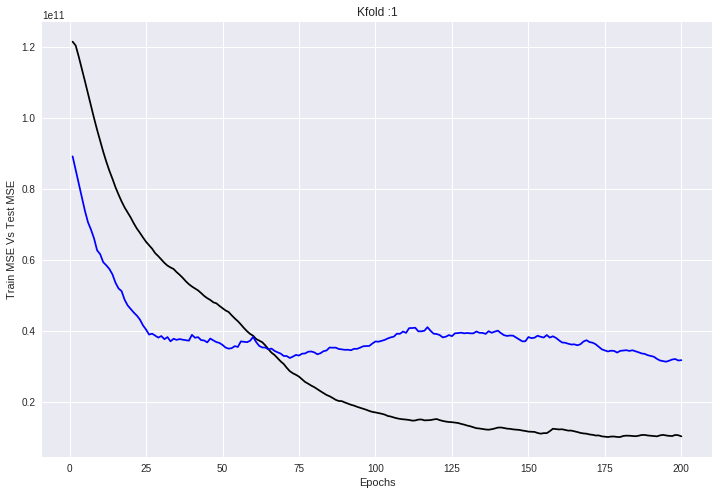

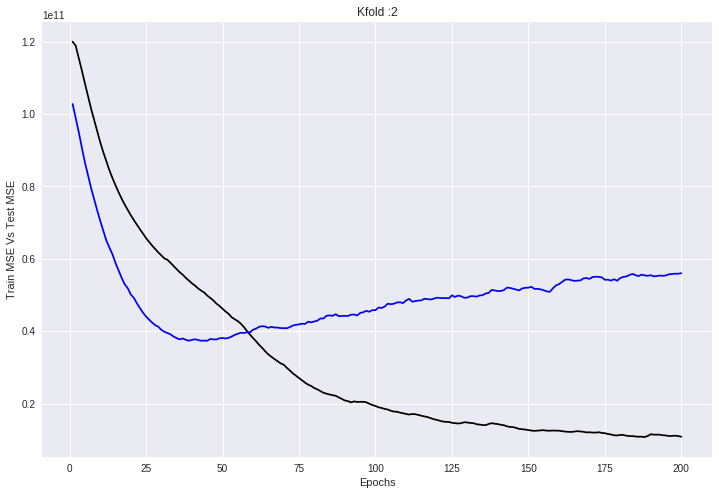

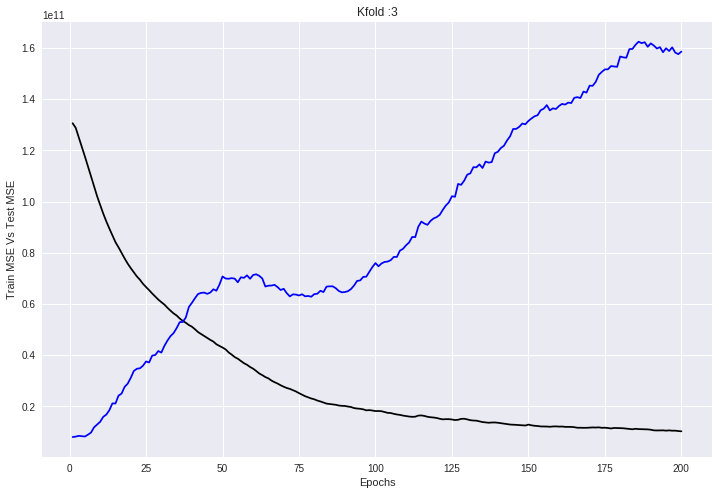

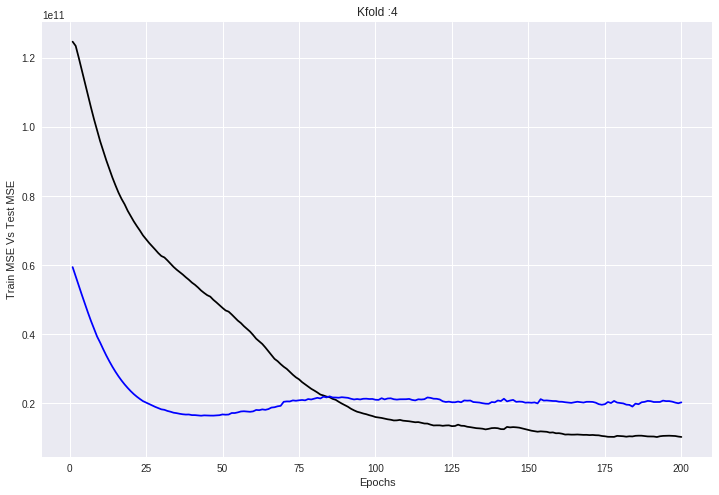

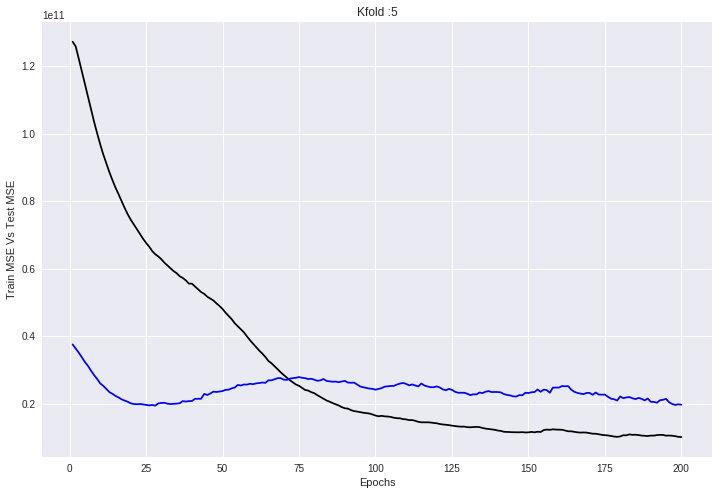

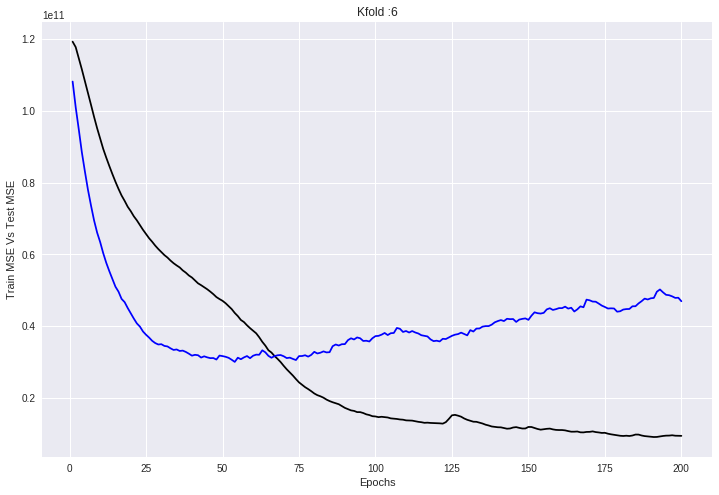

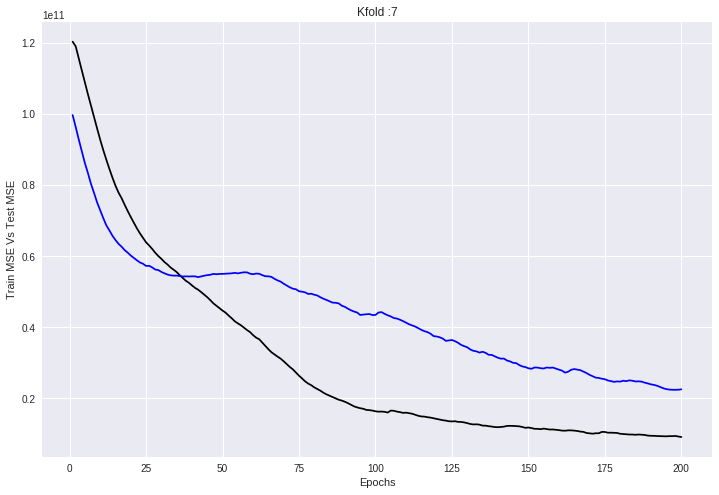

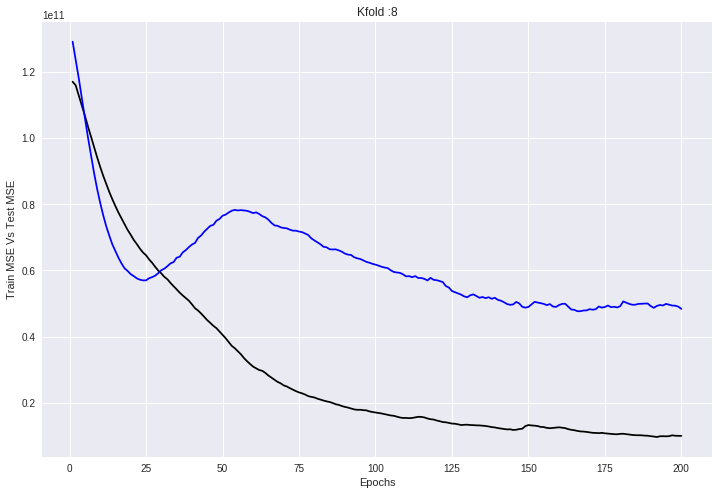

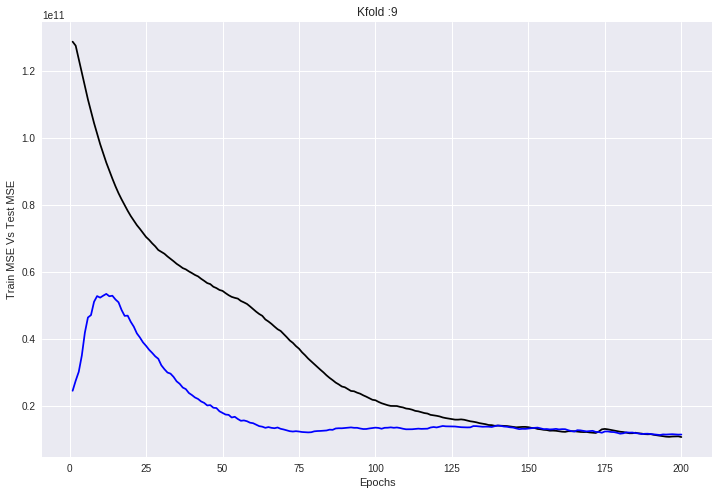

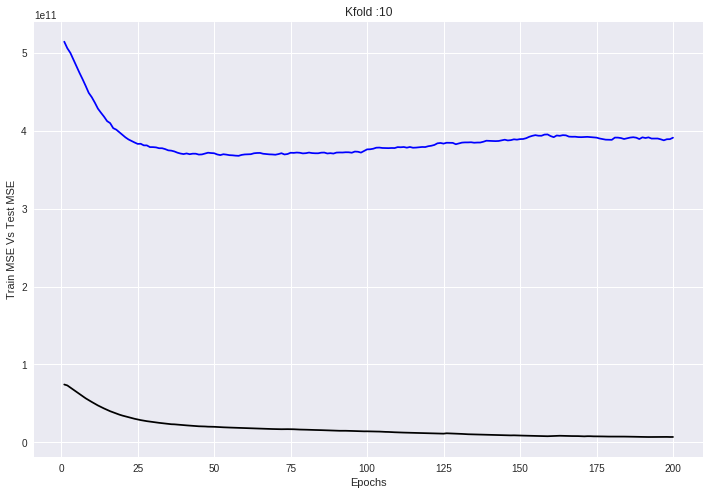

   Test_Epochs  Test_MSE_Score kfold
0        195.0    3.126580e+10     1
0         45.0    3.734785e+10     2
0          1.0    7.966970e+09     3
0         43.0    1.641661e+10     4
0         28.0    1.939270e+10     5
0         54.0    3.000781e+10     6
0        198.0    2.242873e+10     7
0        166.0    4.767584e+10     8
0        193.0    1.126849e+10     9
0         58.0    3.679852e+11    10


In [0]:
g={'kfold' : [],'Test_Epochs' : [],'Test_MSE_Score' : []}
error_tab=pd.DataFrame(data=g)
for j in range(k):
  plt.figure(figsize=(12,8))
  smooth_history = MSE_Score[MSE_Score.kfold==j]
  smooth_history['Epoch']=smooth_history.reset_index().index + 1
  x=range(1, len(smooth_history) + 1)
  y=smooth_curve(smooth_history['Train_MSE_Score'])
  z=smooth_curve(smooth_history['Test_MSE_Score'])
  plt.plot(x,y,color='black',label='sine')
  plt.plot(x,z,color='blue')
  plt.xlabel('Epochs')
  plt.ylabel('Train MSE Vs Test MSE')
  plt.title('Kfold :' + str(j+1))
  plt.show()
  min_epoch=pd.Series(x[np.argmin(z)])
  f=pd.DataFrame({'kfold' : str(j+1),'Test_Epochs' :min_epoch ,'Test_MSE_Score' : z[int(min_epoch)-1] })
  error_tab=error_tab.append(f)
 
print(error_tab)

In [0]:
scaled_variables

,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,...,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468,NN_Test,RF_Test
1,0.004070,0.000727,0.128059,0.044505,0.036473,0.030583,0.021842,0.012469,0.008944,0.008701,...,0.009416,0.008332,0.008234,0.010647,0.017051,0.030410,0.046613,0.008133,47663.765625,57408.8
2,0.005380,0.001074,0.123980,0.045123,0.037561,0.032039,0.022953,0.013645,0.011768,0.019220,...,0.010292,0.011694,0.021226,0.085511,0.129839,0.154746,0.160021,0.008379,281891.500000,423419.9
3,0.003966,0.001439,0.132953,0.050068,0.041372,0.035437,0.025544,0.015763,0.012239,0.013291,...,0.013576,0.012571,0.013815,0.028255,0.064203,0.092728,0.123021,0.059212,122958.914062,91640.4
4,0.004930,0.000309,0.119086,0.038942,0.031029,0.025728,0.017400,0.008705,0.004394,0.002964,...,0.007007,0.005262,0.003843,0.003189,0.003472,0.003939,0.009017,0.001109,20180.804688,11963.7
5,0.006041,0.000636,0.121533,0.041414,0.033206,0.027670,0.018880,0.009881,0.005335,0.003825,...,0.007883,0.005993,0.004941,0.004378,0.004966,0.005990,0.011695,0.006564,16097.458984,22356.7
6,0.004603,0.000066,0.123980,0.044505,0.037017,0.031068,0.021842,0.012469,0.008316,0.007458,...,0.009416,0.008186,0.007594,0.008269,0.014302,0.029613,0.054499,0.005538,46766.828125,44507.4
7,0.004264,0.000171,0.118271,0.041414,0.033751,0.028155,0.019251,0.010116,0.005335,0.003538,...,0.007226,0.005409,0.004117,0.003459,0.004175,0.005724,0.008864,0.002219,21370.347656,14743.2
8,0.003974,0.000262,0.126427,0.043269,0.035928,0.030097,0.020732,0.011528,0.007218,0.005546,...,0.009416,0.007601,0.006221,0.005351,0.006064,0.009222,0.019393,0.002039,25098.484375,17947.7
9,0.004390,0.000443,0.122349,0.042651,0.034839,0.029126,0.019991,0.010822,0.006904,0.007650,...,0.008102,0.006870,0.007777,0.010809,0.021148,0.040888,0.058598,0.006239,73819.218750,55676.1
10,0.004327,0.001590,0.128874,0.050068,0.041549,0.035437,0.025544,0.015528,0.012239,0.013100,...,0.013795,0.012717,0.013083,0.013928,0.019380,0.029349,0.042179,0.003137,30229.486328,66533.2


#Metrics Table

In [0]:
rf_mape_tr = np.std(MAPE_train_reg)
rf_mape_te = np.std(MAPE_validation_reg)

nn_mape_tr = np.std(MAPE_train_nn)
nn_mape_te = np.std(MAPE_test_nn)

nn_mae_tr = np.std(MAE_train_nn)
nn_mae_te = np.std(MAPE_test_nn)

rf_mae_tr = np.std(MAE_train_reg)
rf_maee_te = np.std(MAE_validation_reg)

In [43]:
table= {'Model':['Neural Network','RandomForest'],'MAE_Train':[nn_mae_tr,rf_mae_tr],
        'MAE_Test': [nn_mae_te,rf_maee_te],'MAPE_Train': [nn_mape_tr,rf_mape_tr],
        'MAPE_Test': [nn_mape_te,rf_mape_te]}
summarytable = pd.DataFrame(data=table)
summarytable

,MAE_Test,MAE_Train,MAPE_Test,MAPE_Train,Model
0,303.871911,2242.311353,303.871911,20.989715,Neural Network
1,24690.607762,1947.430269,266.968619,69.584125,RandomForest


#50 Worst Predicted Counties

In [42]:
prediction_validation= np.array(prediction_validation) 
prediction_val = prediction_validation
prediction_val = prediction_val.reshape(1047,)
print(prediction_val.shape)


ValueError: ignored

In [45]:
final = abs(prediction_val-validation_data_y)

print(validation_data_y.shape)

worst = df
worst['ERROR VALUE'] = final

#arrange the column based on highest error values in descending order
worst_50 = worst.nlargest(50, 'ERROR VALUE') 
top_50 = pd.DataFrame(worst_50,columns=['CTYNAME','ERROR VALUE'])
top_50

(314,)


,CTYNAME,ERROR VALUE
3036,Los Angeles,9.498727e+06
3056,San Diego,2.695836e+06
2978,Milwaukee,2.197323e+06
2837,King,1.880913e+06
3055,San Bernardino,1.853976e+06
3097,Denver,1.744100e+06
3051,Riverside,1.645210e+06
3062,Santa Clara,1.572574e+06
3048,Orange,1.485908e+06
3013,Alameda,1.068882e+06


#Box Plots of Metrics For CA, TX, FL

In [35]:
scaled_variables['STNAME'] = df.STNAME
scaled_variables['CTYNAME'] = df.CTYNAME
scaled_variables['medianPopulation'] = df.medianPopulation

scaled_variables

,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,...,DW464,DW465,DW466,DW467,DW468,NN_Test,RF_Test,STNAME,CTYNAME,medianPopulation
1,0.004070,0.000727,0.128059,0.044505,0.036473,0.030583,0.021842,0.012469,0.008944,0.008701,...,0.010647,0.017051,0.030410,0.046613,0.008133,47663.765625,57408.8,Alabama,Autauga,54864
2,0.005380,0.001074,0.123980,0.045123,0.037561,0.032039,0.022953,0.013645,0.011768,0.019220,...,0.085511,0.129839,0.154746,0.160021,0.008379,281891.500000,423419.9,Alabama,Montgomery,227002
3,0.003966,0.001439,0.132953,0.050068,0.041372,0.035437,0.025544,0.015763,0.012239,0.013291,...,0.028255,0.064203,0.092728,0.123021,0.059212,122958.914062,91640.4,Alabama,Morgan,119199
4,0.004930,0.000309,0.119086,0.038942,0.031029,0.025728,0.017400,0.008705,0.004394,0.002964,...,0.003189,0.003472,0.003939,0.009017,0.001109,20180.804688,11963.7,Alabama,Perry,9653
5,0.006041,0.000636,0.121533,0.041414,0.033206,0.027670,0.018880,0.009881,0.005335,0.003825,...,0.004378,0.004966,0.005990,0.011695,0.006564,16097.458984,22356.7,Alabama,Pickens,20282
6,0.004603,0.000066,0.123980,0.044505,0.037017,0.031068,0.021842,0.012469,0.008316,0.007458,...,0.008269,0.014302,0.029613,0.054499,0.005538,46766.828125,44507.4,Alabama,Pike,33267
7,0.004264,0.000171,0.118271,0.041414,0.033751,0.028155,0.019251,0.010116,0.005335,0.003538,...,0.003459,0.004175,0.005724,0.008864,0.002219,21370.347656,14743.2,Alabama,Bullock,10441
8,0.003974,0.000262,0.126427,0.043269,0.035928,0.030097,0.020732,0.011528,0.007218,0.005546,...,0.005351,0.006064,0.009222,0.019393,0.002039,25098.484375,17947.7,Alabama,Randolph,22546
9,0.004390,0.000443,0.122349,0.042651,0.034839,0.029126,0.019991,0.010822,0.006904,0.007650,...,0.010809,0.021148,0.040888,0.058598,0.006239,73819.218750,55676.1,Alabama,Russell,58847
10,0.004327,0.001590,0.128874,0.050068,0.041549,0.035437,0.025544,0.015528,0.012239,0.013100,...,0.013928,0.019380,0.029349,0.042179,0.003137,30229.486328,66533.2,Alabama,St. Clair,86758


In [0]:
data1= scaled_variables[(df.STNAME != 'California') | (df.STNAME != 'Texas') | (df.STNAME != 'Florida') ] 
data2= scaled_variables[(df.STNAME == 'California') | (df.STNAME == 'Texas') | (df.STNAME == 'Florida') ]

In [0]:
data2

In [0]:
import seaborn as sns

In [39]:
data2['APE']=(abs(data2['medianPopulation']-data2['NN_Test'])/abs(data2['medianPopulation']))*100
data2['AE']=abs(data2['medianPopulation']-data2['NN_Test'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


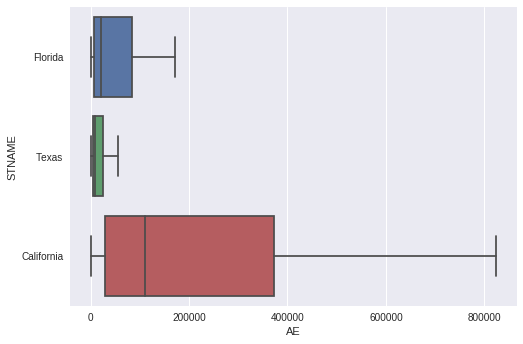

In [40]:
plt.ylim(0,1000)
sns.set(style="whitegrid")
ax = sns.boxplot(x="AE", y="STNAME",showfliers=False, data=data2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


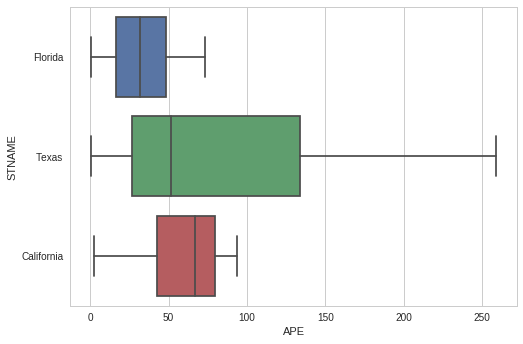

In [41]:
import seaborn as sns
plt.ylim(0,1000)
sns.set(style="whitegrid")
ax = sns.boxplot(x="APE", y="STNAME",showfliers=False, data=data2)